In [1]:
import pandas as pd 
import numpy as np
import os
import pickle
import networkx as nx
import itertools
from itertools import combinations

import statsmodels
import statsmodels.api as sm
import scipy.stats as stats

import matplotlib.pyplot as plt

In [3]:
#Use these lines to unpickle
filename = 'clean_comments'
infile = open(filename,'rb')
cleaned_text = pickle.load(infile)
infile.close()

In [4]:
# Create a sublist of lower case words for each comment -- like tokenization
#nested list
words_com = [com.split() for com in cleaned_text]
print(len(words_com))

78174


## Unweighted Newtork

In [4]:
#Example of a network of words from first 3 comments where edges are tuples of words found in tge same tweet
G = nx.Graph()
for com in words_com[:2]: #Should be modified to add edges from all the comments just remove [:2]
    edges = combinations(com, 2) #include combinations of all words in each comment
    for node_tuple in list(edges):
        G.add_edges_from(itertools.product(node_tuple, node_tuple)) 

In [5]:
#If you want to convert to adj matrix NetX object
nx.adjacency_matrix(G, nodelist=None, weight='weight') 

<7x7 sparse matrix of type '<class 'numpy.intc'>'
	with 29 stored elements in Compressed Sparse Row format>

In [6]:
#Convert graph to adjacency matrix
adj_mat=nx.to_numpy_matrix(G)
print(adj_mat)

[[1. 1. 1. 1. 1. 0. 0.]
 [1. 1. 1. 1. 1. 0. 0.]
 [1. 1. 1. 1. 1. 0. 0.]
 [1. 1. 1. 1. 1. 0. 0.]
 [1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 1. 1.]]


C:\Users\lenovo\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


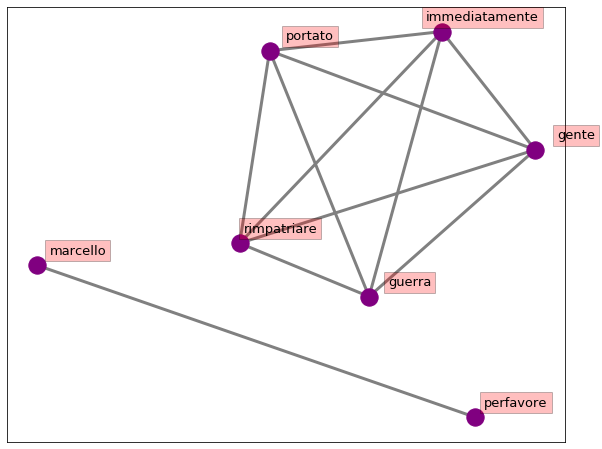

In [7]:
#This is just an example of the first 2 comments network of words
fig, ax = plt.subplots(figsize=(10, 8))

pos = nx.spring_layout(G, k=2)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=3,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
    
plt.show()

## Now we try to construct a weighted edges network

In [13]:
#Graph G1 with weighted edges
G1 = nx.Graph()
mydict={} #weights dictionary
for com in words_com[:3]: #Should be modified to add edges from all the comments just remove [:2]
    edges = combinations(com, 2) #include combinations of all words in each comment
    for node_tuple in list(edges):
        G1.add_edges_from(itertools.product(node_tuple, node_tuple)) 
        mydict.setdefault(node_tuple,0)
        mydict[node_tuple]=mydict[node_tuple]+1
        

In [14]:
#Adding the weights to the corresponding edges
nx.set_edge_attributes(G1, values = mydict, name = 'weight')

In [18]:
#this is to check and view if the weights were added
G1.edges(data = True)
#The weights are successfully added

EdgeDataView([('gente', 'gente', {}), ('gente', 'guerra', {'weight': 1}), ('gente', 'portato', {'weight': 1}), ('gente', 'immediatamente', {'weight': 1}), ('gente', 'rimpatriare', {'weight': 1}), ('guerra', 'guerra', {}), ('guerra', 'portato', {'weight': 1}), ('guerra', 'immediatamente', {'weight': 1}), ('guerra', 'rimpatriare', {'weight': 1}), ('portato', 'portato', {}), ('portato', 'immediatamente', {'weight': 1}), ('portato', 'rimpatriare', {'weight': 1}), ('immediatamente', 'immediatamente', {}), ('immediatamente', 'rimpatriare', {'weight': 1}), ('rimpatriare', 'rimpatriare', {}), ('marcello', 'marcello', {}), ('marcello', 'perfavore', {'weight': 1}), ('perfavore', 'perfavore', {}), ('patrio', 'patrio', {}), ('patrio', 'patriota', {'weight': 1}), ('patrio', 'difeso', {'weight': 1}), ('patrio', 'proprio', {'weight': 1}), ('patrio', 'radice', {'weight': 1}), ('patrio', 'soccombere', {'weight': 1}), ('patrio', 'roma', {'weight': 2}), ('patrio', 'islamico', {'weight': 2}), ('patrio', '

In [15]:
#If you want to convert to adj matrix NetX object
nx.adjacency_matrix(G1, nodelist=None, weight='weight') 

<40x40 sparse matrix of type '<class 'numpy.intc'>'
	with 1118 stored elements in Compressed Sparse Row format>

In [27]:
from numpy import set_printoptions
#Convert graph to adjacency matrix
adj_mat=nx.to_numpy_matrix(G1)
#np.set_printoptions(threshold=np.inf) #I tried to print the full matrix to see if the weights were added OPTIONAL
print(adj_mat)

[[1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]]
